In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## Data Collection

In [4]:
now = datetime.now()

start = datetime(now.year-10,now.month, now.day)
end = now
ticker = 'AAPL'

df = yf.download(ticker, start, end)
df


C:\Users\FARSEEN KP\AppData\Local\Temp\ipykernel_12984\452774873.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: DNSError('Failed to perform, curl: (6) Could not resolve host: query1.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


## 
2. Data Exploration & Visualization

In [5]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL      float64
dtype: object

In [7]:
df = df.reset_index()

In [8]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [9]:
plt.figure(figsize = (12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

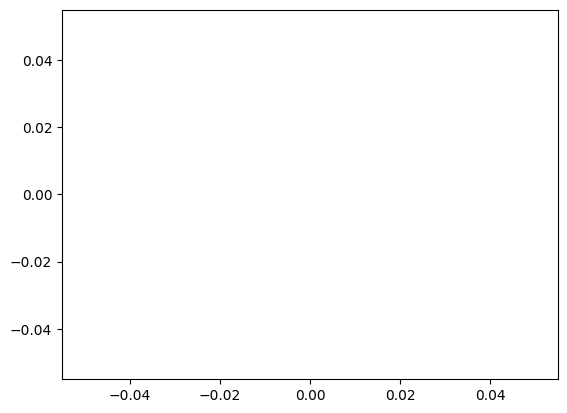

In [10]:
plt.plot(df.Close)

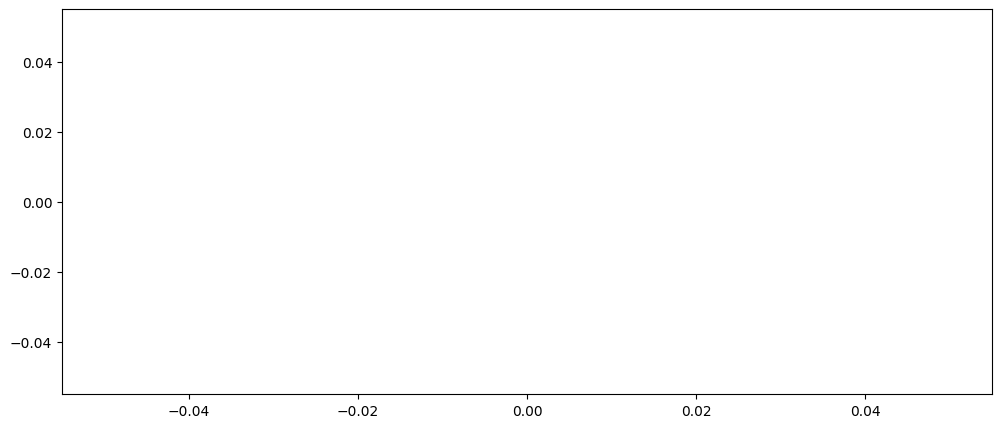

In [11]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)

Text(0, 0.5, 'Close price')

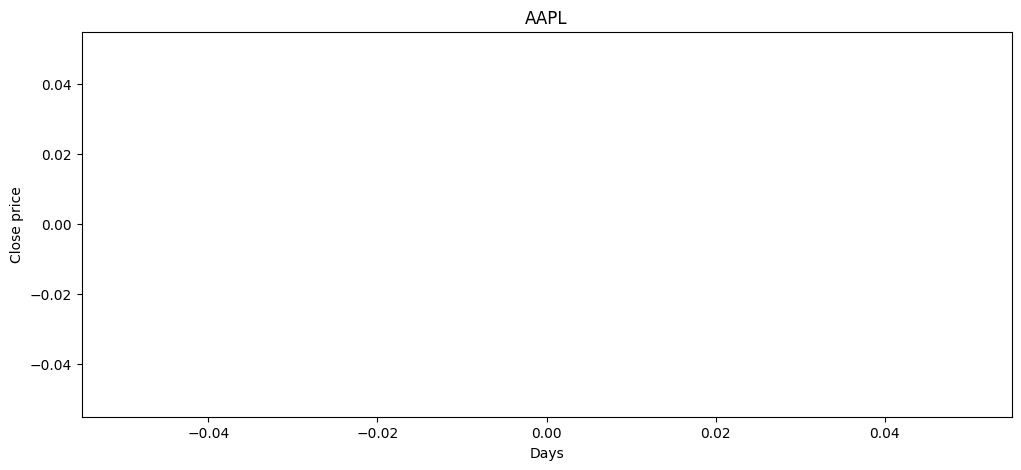

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [13]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,


In [14]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,


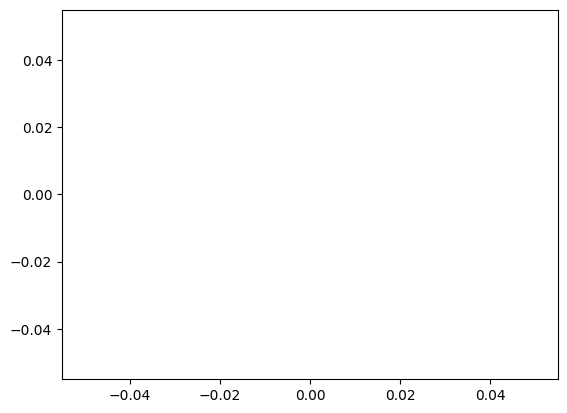

In [15]:
plt.plot(df['MA_100'])

Text(0, 0.5, ' price')

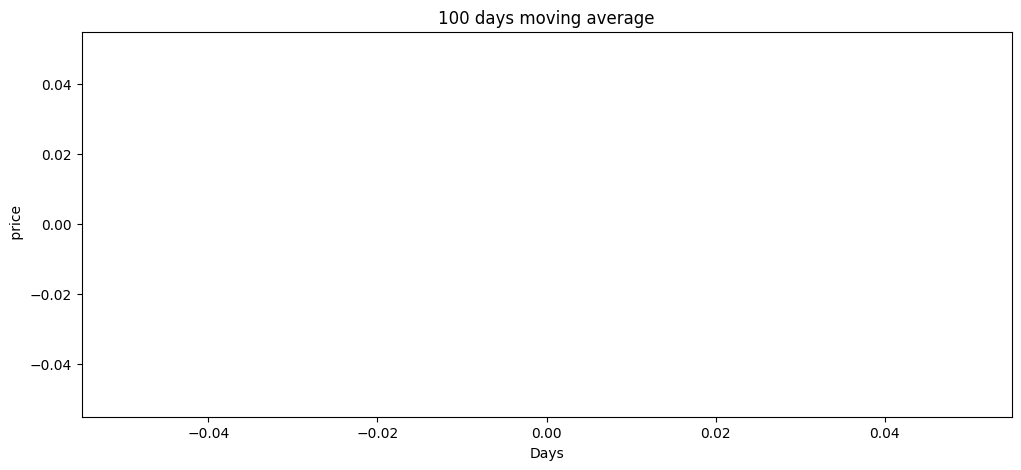

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'])
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel(' price')

Text(0, 0.5, 'Price')

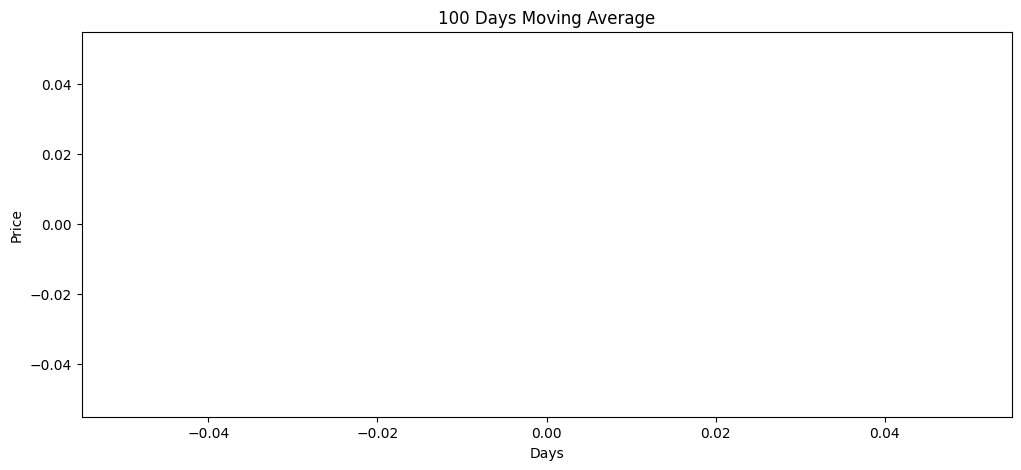

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [18]:
df['MA_200'] = df.Close.rolling(200).mean()

Text(0, 0.5, 'Price')

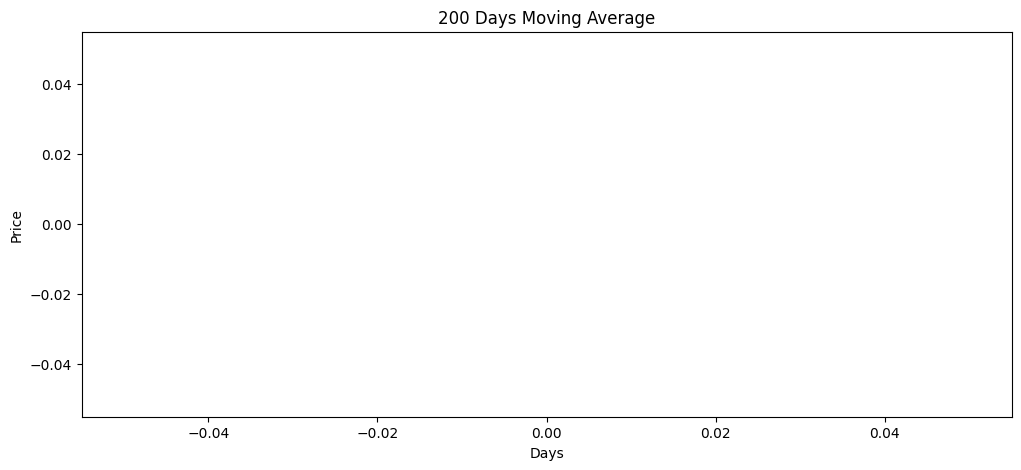

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_200'], 'r')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

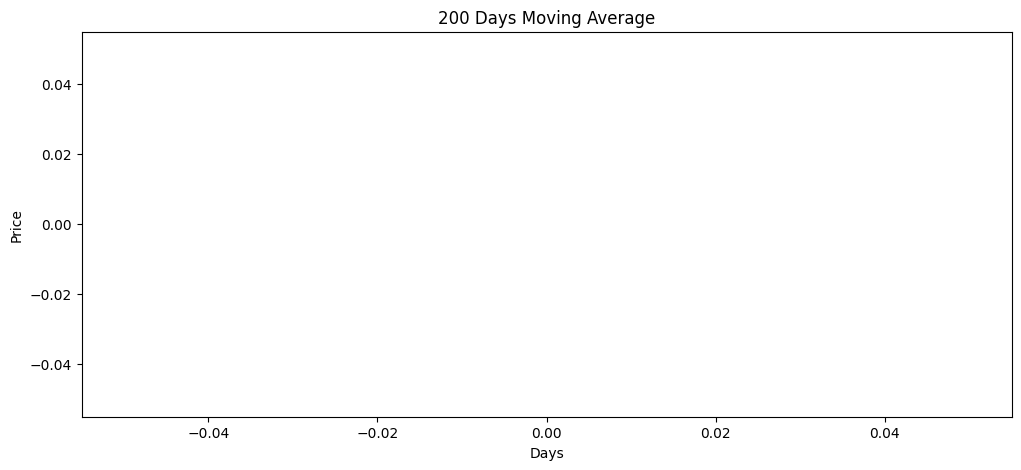

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [21]:
df['Percentage Chaged'] = df.Close.pct_change()
df[['Close', 'Percentage Chaged']]

Price,Close,Percentage Chaged
Ticker,AAPL,


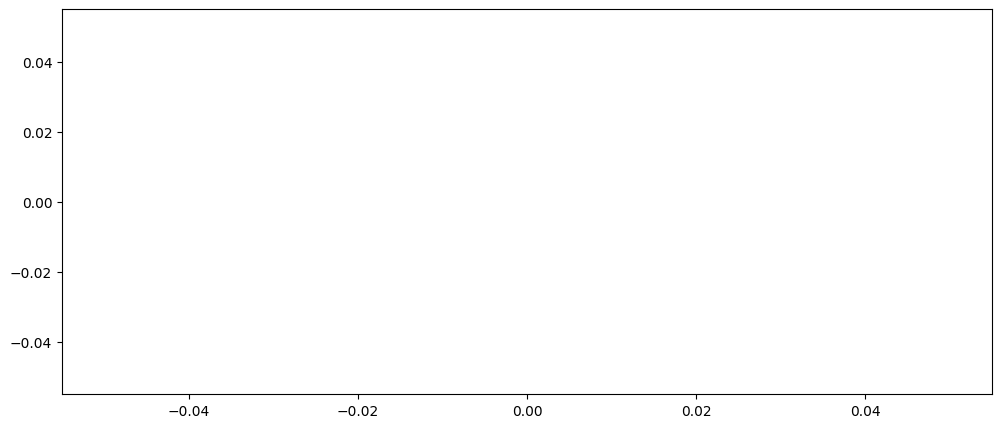

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Chaged'])

# 
4.Data PreProcessing

In [23]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [24]:
print(data_training)
print(data_testing)

Empty DataFrame
Columns: [AAPL]
Index: []
Empty DataFrame
Columns: [AAPL]
Index: []


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
type(data_training_array)

In [ ]:
data_training_array.shape

## 5Sequence Creation

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

In [ ]:
y_train


## 
6. Model Building

In [ ]:
!pip install tensorflow

In [ ]:
!python --version
